<a href="https://colab.research.google.com/github/KhaiNghiTranNguyen/AI-HW1---Fuzzy-logic/blob/main/AI_fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 18.4 MB/s eta 0:00:00


Predicted rainfall: 6.200000000000005


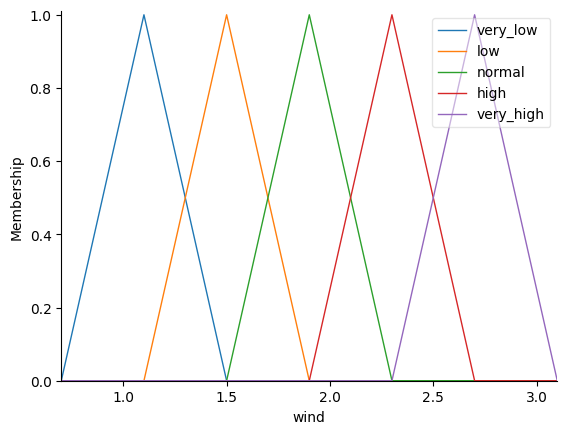

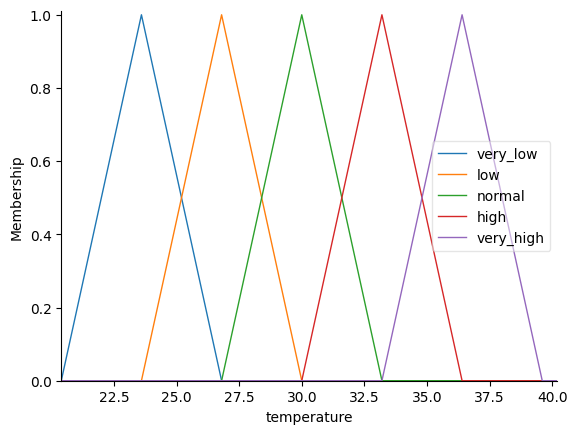

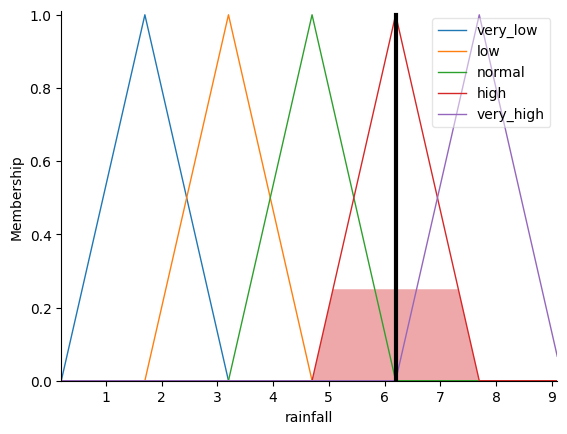

In [2]:
#2.1
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rainfall')

wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])

temperature['very_low'] = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low'] = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal'] = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])

rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])

rule1 = ctrl.Rule(wind['very_low'] & temperature['very_low'], rainfall['very_low'])
rule2 = ctrl.Rule(wind['low'] & temperature['low'], rainfall['low'])
rule3 = ctrl.Rule(wind['normal'] & temperature['normal'], rainfall['normal'])
rule4 = ctrl.Rule(wind['high'] & temperature['high'], rainfall['high'])
rule5 = ctrl.Rule(wind['very_high'] & temperature['very_high'], rainfall['very_high'])

rainfall_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
rainfall_sim = ctrl.ControlSystemSimulation(rainfall_ctrl)

rainfall_sim.input['wind'] = 2.0
rainfall_sim.input['temperature'] = 35

rainfall_sim.compute()

print(f"Predicted rainfall: {rainfall_sim.output['rainfall']}")

wind.view()
temperature.view()
rainfall.view(sim=rainfall_sim)

Diabetes Risk Level: 93.36666666666665


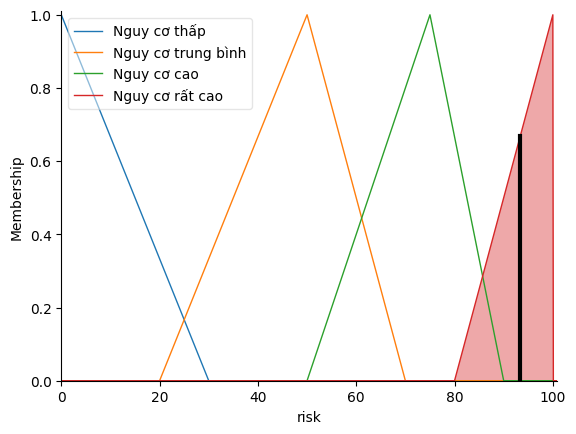

In [3]:
#2.2
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


blood_sugar = ctrl.Antecedent(np.arange(0, 251, 0.1), 'blood_sugar')
bmi = ctrl.Antecedent(np.arange(10, 41, 0.1), 'bmi')
urination = ctrl.Antecedent(np.arange(0, 3, 1), 'urination')
fatigue = ctrl.Antecedent(np.arange(0, 3, 1), 'fatigue')

risk = ctrl.Consequent(np.arange(0, 101, 0.1), 'risk')

blood_sugar['Thấp'] = fuzz.trimf(blood_sugar.universe, [0, 0, 80])
blood_sugar['Bình thường'] = fuzz.trimf(blood_sugar.universe, [80, 100, 120])
blood_sugar['Cao'] = fuzz.trimf(blood_sugar.universe, [120, 160, 200])
blood_sugar['Rất cao'] = fuzz.trapmf(blood_sugar.universe, [200, 220, 250, 250])

bmi['Thiếu cân'] = fuzz.trimf(bmi.universe, [10, 10, 18.5])
bmi['Bình thường'] = fuzz.trimf(bmi.universe, [18.5, 21.7, 24.9])
bmi['Thừa cân'] = fuzz.trimf(bmi.universe, [25, 27.5, 29.9])
bmi['Béo phì'] = fuzz.trapmf(bmi.universe, [30, 33, 40, 40])

urination['Hiếm khi'] = fuzz.trimf(urination.universe, [0, 0, 1])
urination['Đôi khi'] = fuzz.trimf(urination.universe, [0, 1, 2])
urination['Thường xuyên'] = fuzz.trimf(urination.universe, [1, 2, 2])

fatigue['Thấp'] = fuzz.trimf(fatigue.universe, [0, 0, 1])
fatigue['Trung bình'] = fuzz.trimf(fatigue.universe, [0, 1, 2])
fatigue['Cao'] = fuzz.trimf(fatigue.universe, [1, 2, 2])

risk['Nguy cơ thấp'] = fuzz.trimf(risk.universe, [0, 0, 30])
risk['Nguy cơ trung bình'] = fuzz.trimf(risk.universe, [20, 50, 70])
risk['Nguy cơ cao'] = fuzz.trimf(risk.universe, [50, 75, 90])
risk['Nguy cơ rất cao'] = fuzz.trimf(risk.universe, [80, 100, 100])

rule1 = ctrl.Rule(blood_sugar['Rất cao'] & urination['Thường xuyên'], risk['Nguy cơ rất cao'])
rule2 = ctrl.Rule(blood_sugar['Rất cao'] & urination['Đôi khi'], risk['Nguy cơ cao'])
rule3 = ctrl.Rule(blood_sugar['Cao'] & urination['Thường xuyên'], risk['Nguy cơ cao'])
rule4 = ctrl.Rule(blood_sugar['Bình thường'] & urination['Hiếm khi'], risk['Nguy cơ thấp'])
rule5 = ctrl.Rule(blood_sugar['Rất cao'] & bmi['Béo phì'], risk['Nguy cơ rất cao'])
rule6 = ctrl.Rule(blood_sugar['Rất cao'] & bmi['Thừa cân'], risk['Nguy cơ cao'])
rule7 = ctrl.Rule(blood_sugar['Cao'] & bmi['Thừa cân'], risk['Nguy cơ cao'])
rule8 = ctrl.Rule(blood_sugar['Cao'] & bmi['Thừa cân'], risk['Nguy cơ trung bình']) #Duplicated rule
rule9 = ctrl.Rule(blood_sugar['Bình thường'] & bmi['Bình thường'], risk['Nguy cơ thấp'])
rule10 = ctrl.Rule(blood_sugar['Rất cao'] & fatigue['Cao'], risk['Nguy cơ rất cao'])
rule11 = ctrl.Rule(blood_sugar['Cao'] & fatigue['Cao'], risk['Nguy cơ cao'])
rule12 = ctrl.Rule(blood_sugar['Cao'] & fatigue['Trung bình'], risk['Nguy cơ trung bình'])
rule13 = ctrl.Rule(blood_sugar['Bình thường'] & fatigue['Thấp'], risk['Nguy cơ thấp'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

# Input values for testing (example)
fuzzy_system.input['blood_sugar'] = 220 # Example: Very High blood sugar
fuzzy_system.input['bmi'] = 32 # Example: Obese
fuzzy_system.input['urination'] = 2 # Example: Often
fuzzy_system.input['fatigue'] = 2 # Example: High

# Compute the result
fuzzy_system.compute()

# Print the results
print(f"Diabetes Risk Level: {fuzzy_system.output['risk']}")

# Show the risk membership function with the result
risk.view(sim=fuzzy_system)

Final Price: 61.32638888888895


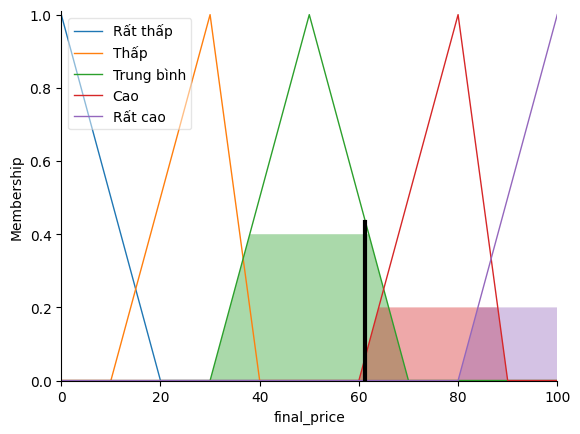

In [4]:
#2.3
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

demand_level = ctrl.Antecedent(np.arange(0, 11, 1), 'demand_level')
competitor_pricing = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_pricing')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 3, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 11, 1), 'stock_level')

final_price = ctrl.Consequent(np.arange(0, 101, 1), 'final_price')

demand_level['Thấp'] = fuzz.trimf(demand_level.universe, [0, 0, 5])
demand_level['Trung bình'] = fuzz.trimf(demand_level.universe, [0, 5, 10])
demand_level['Cao'] = fuzz.trimf(demand_level.universe, [5, 10, 10])

competitor_pricing['Thấp'] = fuzz.trimf(competitor_pricing.universe, [0, 0, 5])
competitor_pricing['Trung bình'] = fuzz.trimf(competitor_pricing.universe, [0, 5, 10])
competitor_pricing['Cao'] = fuzz.trimf(competitor_pricing.universe, [5, 10, 10])

production_cost['Thấp'] = fuzz.trimf(production_cost.universe, [0, 0, 5])
production_cost['Trung bình'] = fuzz.trimf(production_cost.universe, [0, 5, 10])
production_cost['Cao'] = fuzz.trimf(production_cost.universe, [5, 10, 10])

seasonality['Ngoài thời cao điểm'] = fuzz.trimf(seasonality.universe, [0, 0, 1])
seasonality['Bình thường'] = fuzz.trimf(seasonality.universe, [0, 1, 2])
seasonality['Cao điểm'] = fuzz.trimf(seasonality.universe, [1, 2, 2])

stock_level['Thấp'] = fuzz.trimf(stock_level.universe, [0, 0, 5])
stock_level['Trung bình'] = fuzz.trimf(stock_level.universe, [0, 5, 10])
stock_level['Cao'] = fuzz.trimf(stock_level.universe, [5, 10, 10])

final_price['Rất thấp'] = fuzz.trimf(final_price.universe, [0, 0, 20])
final_price['Thấp'] = fuzz.trimf(final_price.universe, [10, 30, 40])
final_price['Trung bình'] = fuzz.trimf(final_price.universe, [30, 50, 70])
final_price['Cao'] = fuzz.trimf(final_price.universe, [60, 80, 90])
final_price['Rất cao'] = fuzz.trimf(final_price.universe, [80, 100, 100])

rule1 = ctrl.Rule(demand_level['Cao'] & competitor_pricing['Cao'] & stock_level['Thấp'], final_price['Rất cao'])
rule2 = ctrl.Rule(demand_level['Cao'] & seasonality['Cao điểm'] & stock_level['Thấp'], final_price['Rất cao'])
rule3 = ctrl.Rule(demand_level['Trung bình'] & production_cost['Cao'] & stock_level['Thấp'], final_price['Rất cao'])

rule4 = ctrl.Rule(demand_level['Cao'] & competitor_pricing['Trung bình'] & stock_level['Trung bình'], final_price['Cao'])
rule5 = ctrl.Rule(demand_level['Trung bình'] & competitor_pricing['Cao'] & stock_level['Thấp'], final_price['Cao'])
rule6 = ctrl.Rule(demand_level['Trung bình'] & competitor_pricing['Cao'] & stock_level['Thấp'], final_price['Cao'])
rule7 = ctrl.Rule(demand_level['Cao'] & seasonality['Cao điểm'] & stock_level['Trung bình'], final_price['Cao'])

rule8 = ctrl.Rule(demand_level['Trung bình'] & competitor_pricing['Trung bình'] & stock_level['Trung bình'], final_price['Trung bình'])
rule9 = ctrl.Rule(demand_level['Thấp'] & competitor_pricing['Cao'] & stock_level['Trung bình'], final_price['Trung bình'])
rule10 = ctrl.Rule(demand_level['Trung bình'] & production_cost['Trung bình'] & stock_level['Trung bình'], final_price['Trung bình'])

rule11 = ctrl.Rule(demand_level['Thấp'] & competitor_pricing['Thấp'] & stock_level['Cao'], final_price['Thấp'])
rule12 = ctrl.Rule(demand_level['Trung bình'] & production_cost['Thấp'] & stock_level['Cao'], final_price['Thấp'])
rule13 = ctrl.Rule(demand_level['Thấp'] & seasonality['Ngoài thời cao điểm'] & stock_level['Cao'], final_price['Thấp'])

rule14 = ctrl.Rule(demand_level['Thấp'] & competitor_pricing['Thấp'] & stock_level['Cao'], final_price['Rất thấp'])
rule15 = ctrl.Rule(demand_level['Thấp'] & seasonality['Ngoài thời cao điểm'] & stock_level['Cao'], final_price['Rất thấp'])
rule16 = ctrl.Rule(demand_level['Trung bình'] & competitor_pricing['Thấp'] & stock_level['Cao'], final_price['Rất thấp'])
rule17 = ctrl.Rule(demand_level['Trung bình'] & competitor_pricing['Thấp'] & stock_level['Cao'], final_price['Rất thấp'])

pricing_control = ctrl.ControlSystem([
    rule1, rule2, rule3,
    rule4, rule5, rule6, rule7,
    rule8, rule9, rule10,
    rule11, rule12, rule13,
    rule14, rule15, rule16, rule17
    ])
pricing_system = ctrl.ControlSystemSimulation(pricing_control)

pricing_system.input['demand_level'] = 6
pricing_system.input['competitor_pricing'] = 5
pricing_system.input['production_cost'] = 3
pricing_system.input['seasonality'] = 2
pricing_system.input['stock_level'] = 2

pricing_system.compute()

print(f"Final Price: {pricing_system.output['final_price']}")


final_price.view(sim=pricing_system)

Recommended Wash Time: 30.03543073369708 minutes
Recommended Water Level: 4.623188405797102


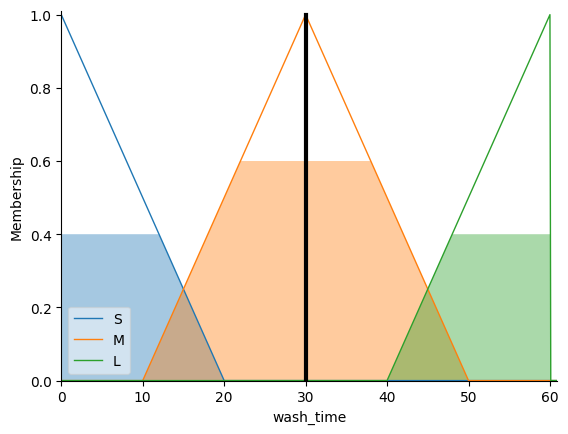

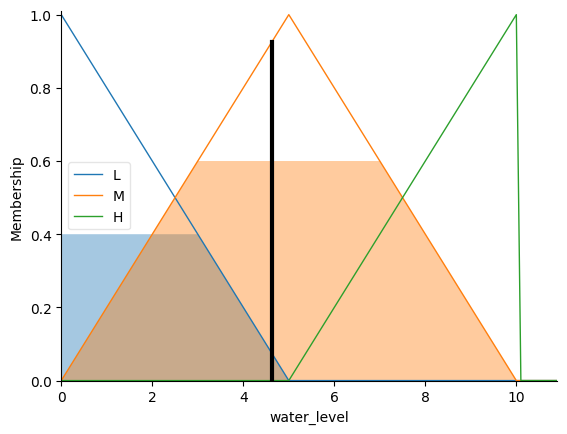

In [5]:
#2.4
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

load = ctrl.Antecedent(np.arange(0, 11, 0.1), 'load')
dirt = ctrl.Antecedent(np.arange(0, 11, 0.1), 'dirt')
fabric = ctrl.Antecedent(np.arange(0, 3, 0.1), 'fabric')

wash_time = ctrl.Consequent(np.arange(0, 61, 0.1), 'wash_time')
water_level = ctrl.Consequent(np.arange(0, 11, 0.1), 'water_level')

load['S'] = fuzz.trimf(load.universe, [0, 0, 5])
load['M'] = fuzz.trimf(load.universe, [0, 5, 10])
load['L'] = fuzz.trimf(load.universe, [5, 10, 10])

dirt['L'] = fuzz.trimf(dirt.universe, [0, 0, 5])
dirt['M'] = fuzz.trimf(dirt.universe, [0, 5, 10])
dirt['H'] = fuzz.trimf(dirt.universe, [5, 10, 10])

fabric['D'] = fuzz.trimf(fabric.universe, [0, 0, 1])
fabric['N'] = fuzz.trimf(fabric.universe, [0, 1, 2])
fabric['H'] = fuzz.trimf(fabric.universe, [1, 2, 2])


wash_time['S'] = fuzz.trimf(wash_time.universe, [0, 0, 20])
wash_time['M'] = fuzz.trimf(wash_time.universe, [10, 30, 50])
wash_time['L'] = fuzz.trimf(wash_time.universe, [40, 60, 60])

water_level['L'] = fuzz.trimf(water_level.universe, [0, 0, 5])
water_level['M'] = fuzz.trimf(water_level.universe, [0, 5, 10])
water_level['H'] = fuzz.trimf(water_level.universe, [5, 10, 10])

rule1 = ctrl.Rule(load['S'] & dirt['L'], (wash_time['S'], water_level['L']))
rule2 = ctrl.Rule(load['S'] & dirt['M'], (wash_time['M'], water_level['M']))
rule3 = ctrl.Rule(load['S'] & dirt['H'], (wash_time['L'], water_level['M']))
rule4 = ctrl.Rule(load['M'] & dirt['L'], (wash_time['M'], water_level['M']))
rule5 = ctrl.Rule(load['M'] & dirt['M'], (wash_time['L'], water_level['M']))
rule6 = ctrl.Rule(load['M'] & dirt['H'], (wash_time['L'], water_level['H']))
rule7 = ctrl.Rule(load['L'] & dirt['L'], (wash_time['M'], water_level['H']))
rule8 = ctrl.Rule(load['L'] & dirt['L'], (wash_time['L'], water_level['H']))
rule9 = ctrl.Rule(load['L'] & dirt['M'], (wash_time['L'], water_level['H']))
rule10 = ctrl.Rule(load['L'] & dirt['M'], (wash_time['L'], water_level['H']))
rule11 = ctrl.Rule(load['L'] & dirt['H'], (wash_time['L'], water_level['H']))
rule12 = ctrl.Rule(fabric['D'], (wash_time['S'], water_level['L']))
rule13 = ctrl.Rule(fabric['N'], (wash_time['M'], water_level['M']))
rule14 = ctrl.Rule(fabric['H'], (wash_time['L'], water_level['H']))
rule15 = ctrl.Rule(load['L'] & dirt['H'] & fabric['H'], (wash_time['L'], water_level['H']))
rule16 = ctrl.Rule(load['S'] & dirt['L'] & fabric['D'], (wash_time['S'], water_level['L']))
rule17 = ctrl.Rule(load['M'] & dirt['M'] & fabric['N'], (wash_time['M'], water_level['M']))

washing_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11,
    rule12, rule13, rule14,
    rule15, rule16, rule17
    ])
washing_sim = ctrl.ControlSystemSimulation(washing_ctrl)

washing_sim.input['load'] = 2
washing_sim.input['dirt'] = 3
washing_sim.input['fabric'] = 4
washing_sim.compute()

print(f"Recommended Wash Time: {washing_sim.output['wash_time']} minutes")
print(f"Recommended Water Level: {washing_sim.output['water_level']}")

wash_time.view(sim=washing_sim)
water_level.view(sim=washing_sim)

Fan Speed: 4.0715667311412
Cooling Level: 4.153439153439154


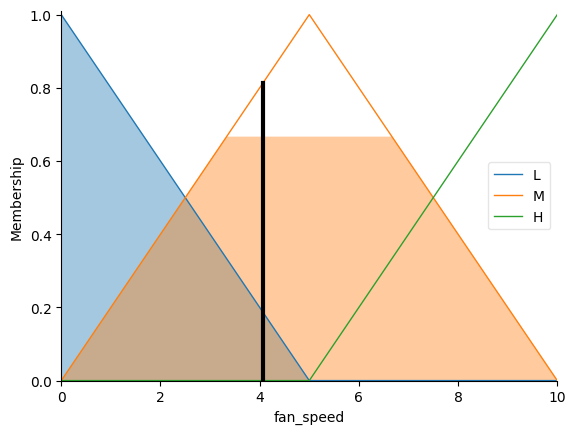

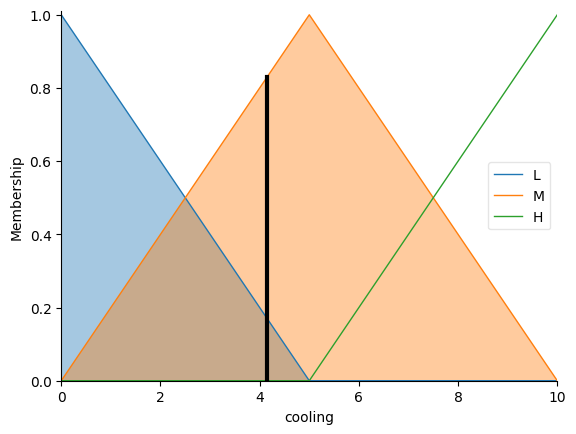

In [6]:
#2.5
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
people = ctrl.Antecedent(np.arange(0, 11, 1), 'people')

fan_speed = ctrl.Consequent(np.arange(0, 11, 1), 'fan_speed')
cooling = ctrl.Consequent(np.arange(0, 11, 1), 'cooling')

temperature['C'] = fuzz.trimf(temperature.universe, [15, 15, 22])
temperature['CL'] = fuzz.trimf(temperature.universe, [18, 22, 25])
temperature['CM'] = fuzz.trimf(temperature.universe, [22, 25, 28])
temperature['W'] = fuzz.trimf(temperature.universe, [25, 28, 32])
temperature['H'] = fuzz.trimf(temperature.universe, [28, 40, 40])

humidity['L'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['M'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['H'] = fuzz.trimf(humidity.universe, [60, 100, 100])

people['F'] = fuzz.trimf(people.universe, [0, 0, 4])
people['M'] = fuzz.trimf(people.universe, [2, 5, 7])
people['MA'] = fuzz.trimf(people.universe, [6, 10, 10])

fan_speed['L'] = fuzz.trimf(fan_speed.universe, [0, 0, 5])
fan_speed['M'] = fuzz.trimf(fan_speed.universe, [0, 5, 10])
fan_speed['H'] = fuzz.trimf(fan_speed.universe, [5, 10, 10])

cooling['L'] = fuzz.trimf(cooling.universe, [0, 0, 5])
cooling['M'] = fuzz.trimf(cooling.universe, [0, 5, 10])
cooling['H'] = fuzz.trimf(cooling.universe, [5, 10, 10])

rule1 = ctrl.Rule(temperature['C'], fan_speed['L'])
rule2 = ctrl.Rule(temperature['CL'], fan_speed['L'])
rule3 = ctrl.Rule(temperature['CM'], fan_speed['M'])
rule4 = ctrl.Rule(temperature['W'], fan_speed['H'])
rule5 = ctrl.Rule(temperature['H'], fan_speed['H'])

rule6 = ctrl.Rule(temperature['C'], cooling['L'])
rule7 = ctrl.Rule(temperature['CL'], cooling['L'])
rule8 = ctrl.Rule(temperature['CM'], cooling['M'])
rule9 = ctrl.Rule(temperature['W'], cooling['H'])
rule10 = ctrl.Rule(temperature['H'], cooling['H'])

rule11 = ctrl.Rule(humidity['L'], cooling['L'])
rule12 = ctrl.Rule(humidity['M'], cooling['M'])
rule13 = ctrl.Rule(humidity['H'], cooling['H'])

rule14 = ctrl.Rule(people['F'], fan_speed['L'])
rule15 = ctrl.Rule(people['M'], fan_speed['M'])
rule16 = ctrl.Rule(people['MA'], fan_speed['H'])

rule17 = ctrl.Rule(temperature['H'] & humidity['H'] & people['MA'], (cooling['H'], fan_speed['H']))
rule18 = ctrl.Rule(temperature['CM'] & humidity['M'] & people['M'], (cooling['M'], fan_speed['M']))
rule19 = ctrl.Rule(temperature['CL'] & humidity['L'] & people['F'], (cooling['L'], fan_speed['L']))

ac_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5,
    rule6, rule7, rule8, rule9, rule10,
    rule11, rule12,
    rule13, rule14, rule15,
    rule16, rule17, rule18, rule19])
ac_sim = ctrl.ControlSystemSimulation(ac_ctrl)

ac_sim.input['temperature'] = 10
ac_sim.input['humidity'] = 50
ac_sim.input['people'] = 4
ac_sim.compute()
print(f"Fan Speed: {ac_sim.output['fan_speed']}")
print(f"Cooling Level: {ac_sim.output['cooling']}")
fan_speed.view(sim=ac_sim)
cooling.view(sim=ac_sim)

Cooking Time: 29.188756118250136 minutes
Power Level: 56.66666666666673


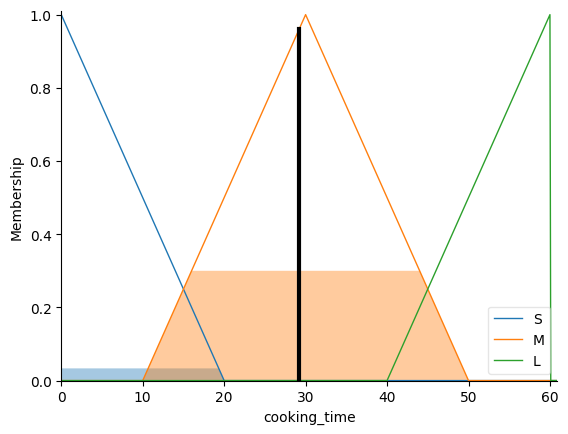

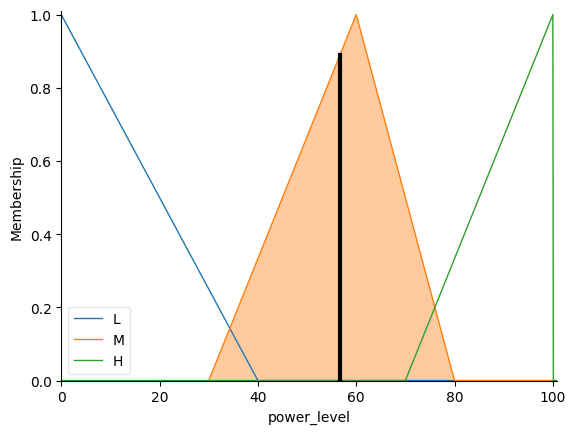

In [7]:
#2.6
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

weight = ctrl.Antecedent(np.arange(0, 1001, 0.1), 'weight')
food_type = ctrl.Antecedent(np.arange(0, 3, 1), 'food_type')
temperature = ctrl.Antecedent(np.arange(0, 61, 0.1), 'temperature')

cooking_time = ctrl.Consequent(np.arange(0, 61, 0.1), 'cooking_time')
power_level = ctrl.Consequent(np.arange(0, 101, 0.1), 'power_level')

weight['L'] = fuzz.trimf(weight.universe, [0, 0, 300])
weight['M'] = fuzz.trimf(weight.universe, [200, 500, 800])
weight['H'] = fuzz.trimf(weight.universe, [700, 1000, 1000])

food_type['S'] = fuzz.trimf(food_type.universe, [0, 0, 1])
food_type['M'] = fuzz.trimf(food_type.universe, [0, 1, 2])
food_type['H'] = fuzz.trimf(food_type.universe, [1, 2, 2])

temperature['C'] = fuzz.trimf(temperature.universe, [0, 0, 10])
temperature['W'] = fuzz.trimf(temperature.universe, [20, 25, 30])
temperature['H'] = fuzz.trimf(temperature.universe, [40, 50, 60])

cooking_time['S'] = fuzz.trimf(cooking_time.universe, [0, 0, 20])
cooking_time['M'] = fuzz.trimf(cooking_time.universe, [10, 30, 50])
cooking_time['L'] = fuzz.trimf(cooking_time.universe, [40, 60, 60])

power_level['L'] = fuzz.trimf(power_level.universe, [0, 0, 40])
power_level['M'] = fuzz.trimf(power_level.universe, [30, 60, 80])
power_level['H'] = fuzz.trimf(power_level.universe, [70, 100, 100])

rule1 = ctrl.Rule(weight['L'], cooking_time['S'])
rule2 = ctrl.Rule(weight['M'], cooking_time['M'])
rule3 = ctrl.Rule(weight['H'], cooking_time['L'])

rule4 = ctrl.Rule(food_type['S'], power_level['L'])
rule5 = ctrl.Rule(food_type['M'], power_level['M'])
rule6 = ctrl.Rule(food_type['H'], power_level['H'])

rule7 = ctrl.Rule(temperature['C'], cooking_time['L'])
rule8 = ctrl.Rule(temperature['W'], cooking_time['M'])
rule9 = ctrl.Rule(temperature['H'], cooking_time['S'])

rule10 = ctrl.Rule(weight['H'] & food_type['H'] & temperature['C'], (cooking_time['L'], power_level['H']))
rule11 = ctrl.Rule(weight['M'] & food_type['S'] & temperature['W'], (cooking_time['M'], power_level['L']))
rule12 = ctrl.Rule(weight['L'] & food_type['M'] & temperature['H'], (cooking_time['S'], power_level['M']))

microwave_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3,
    rule4, rule5, rule6,
    rule7, rule8, rule9,
    rule10, rule11, rule12
    ])
microwave_sim = ctrl.ControlSystemSimulation(microwave_ctrl)

microwave_sim.input['weight'] = 290
microwave_sim.input['food_type'] = 1
microwave_sim.input['temperature'] = 30
microwave_sim.compute()
print(f"Cooking Time: {microwave_sim.output['cooking_time']} minutes")
print(f"Power Level: {microwave_sim.output['power_level']}")
cooking_time.view(sim=microwave_sim)
power_level.view(sim=microwave_sim)

Medication: 5.000000000000002
Oxygen Therapy: 4.999999999999999


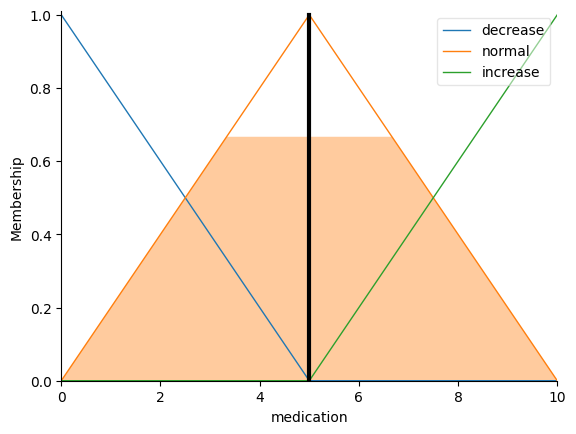

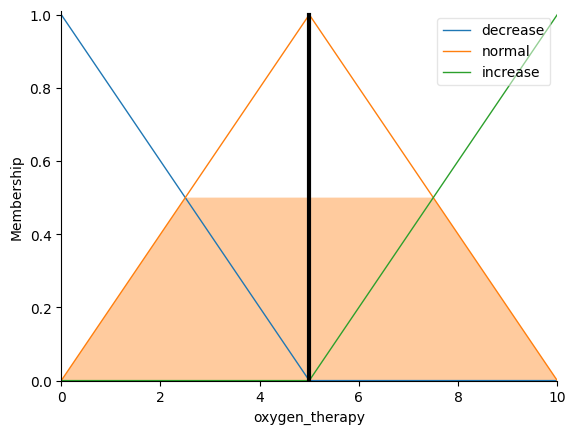

In [8]:
#2.8
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

heart_rate = ctrl.Antecedent(np.arange(0, 181, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(0, 201, 1), 'blood_pressure')
body_temperature = ctrl.Antecedent(np.arange(30, 42, 0.1), 'body_temperature')
oxygen_saturation = ctrl.Antecedent(np.arange(0, 101, 1), 'oxygen_saturation')
blood_sugar = ctrl.Antecedent(np.arange(0, 200, 1), 'blood_sugar')

medication = ctrl.Consequent(np.arange(0, 11, 1), 'medication')
fluid_infusion = ctrl.Consequent(np.arange(0, 11, 0.1), 'fluid_infusion')
oxygen_therapy = ctrl.Consequent(np.arange(0, 11, 1), 'oxygen_therapy')

heart_rate['low'] = fuzz.trimf(heart_rate.universe, [0, 0, 60])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [60, 80, 100])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [100, 140, 180])

blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [0, 60, 90])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [90, 120, 140])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [140, 180, 200])

body_temperature['low'] = fuzz.trimf(body_temperature.universe, [30, 35, 36])
body_temperature['normal'] = fuzz.trimf(body_temperature.universe, [36, 37.5, 38])
body_temperature['high'] = fuzz.trimf(body_temperature.universe, [38, 40, 42])

oxygen_saturation['low'] = fuzz.trimf(oxygen_saturation.universe, [0, 50, 80])
oxygen_saturation['normal'] = fuzz.trimf(oxygen_saturation.universe, [80, 90, 100])
oxygen_saturation['high'] = fuzz.trimf(oxygen_saturation.universe, [90, 95, 100])

blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [0, 60, 100])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [100, 120, 140])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [140, 180, 200])

medication['decrease'] = fuzz.trimf(medication.universe, [0, 0, 5])
medication['normal'] = fuzz.trimf(medication.universe, [0, 5, 10])
medication['increase'] = fuzz.trimf(medication.universe, [5, 10, 10])

fluid_infusion['decrease'] = fuzz.trimf(fluid_infusion.universe, [0, 0, 5])
fluid_infusion['normal'] = fuzz.trimf(fluid_infusion.universe, [0, 5, 10])
fluid_infusion['increase'] = fuzz.trimf(fluid_infusion.universe, [5, 10, 10])

oxygen_therapy['decrease'] = fuzz.trimf(oxygen_therapy.universe, [0, 0, 5])
oxygen_therapy['normal'] = fuzz.trimf(oxygen_therapy.universe, [0, 5, 10])
oxygen_therapy['increase'] = fuzz.trimf(oxygen_therapy.universe, [5, 10, 10])

rule1 = ctrl.Rule(heart_rate['low'] & blood_pressure['low'], fluid_infusion['increase'])
rule2 = ctrl.Rule(heart_rate['high'] & blood_pressure['high'], medication['decrease'])
rule3 = ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'], medication['normal'])
rule4 = ctrl.Rule(body_temperature['low'] & oxygen_saturation['low'], oxygen_therapy['increase'])
rule5 = ctrl.Rule(body_temperature['normal'] & oxygen_saturation['normal'], oxygen_therapy['normal'])
rule6 = ctrl.Rule(body_temperature['high'] & oxygen_saturation['low'], oxygen_therapy['increase'])
rule7 = ctrl.Rule(blood_sugar['low'], medication['increase'])
rule8 = ctrl.Rule(blood_sugar['high'], medication['decrease'])
rule9 = ctrl.Rule(blood_sugar['normal'], medication['normal'])
rule10 = ctrl.Rule(blood_pressure['high'] & blood_sugar['high'], medication['decrease'])
rule11 = ctrl.Rule(blood_pressure['low'] & blood_sugar['high'], fluid_infusion['increase'])
rule12 = ctrl.Rule(blood_pressure['high'] & blood_sugar['low'], fluid_infusion['increase'])

medication_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
medication_sim = ctrl.ControlSystemSimulation(medication_ctrl)

medication_sim.input['heart_rate'] = 75
medication_sim.input['blood_pressure'] = 110
medication_sim.input['body_temperature'] = 37
medication_sim.input['oxygen_saturation'] = 95
medication_sim.input['blood_sugar'] = 100
medication_sim.compute()
print(f"Medication: {medication_sim.output['medication']}")
print(f"Oxygen Therapy: {medication_sim.output['oxygen_therapy']}")
medication.view(sim=medication_sim)
oxygen_therapy.view(sim=medication_sim)

Review Sentiment Classification: 8.815833333333334


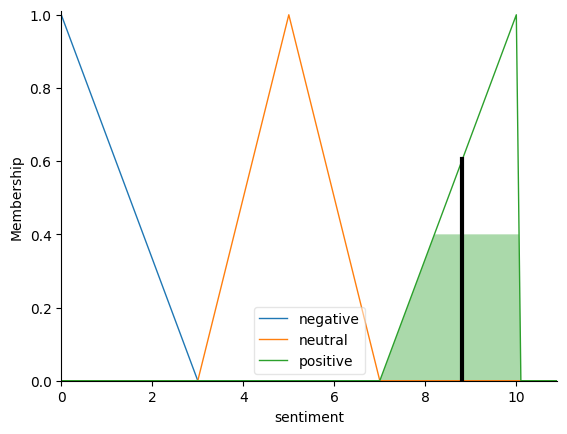

In [9]:
#2.9
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 11, 0.1), 'emotion_intensity')
positive_words = ctrl.Antecedent(np.arange(0, 11, 1), 'positive_words')
negative_words = ctrl.Antecedent(np.arange(0, 11, 1), 'negative_words')
reviewsentiment = ctrl.Consequent(np.arange(0, 11, 0.1), 'sentiment')

sentiment_score['negative'] = fuzz.trimf(sentiment_score.universe, [0, 0, 0.3])
sentiment_score['neutral'] = fuzz.trimf(sentiment_score.universe, [0.3, 0.5, 0.7])
sentiment_score['positive'] = fuzz.trimf(sentiment_score.universe, [0.7, 1, 1])

emotion_intensity['low'] = fuzz.trimf(emotion_intensity.universe, [0, 0, 3])
emotion_intensity['medium'] = fuzz.trimf(emotion_intensity.universe, [3, 5, 7])
emotion_intensity['high'] = fuzz.trimf(emotion_intensity.universe, [7, 10, 10])

positive_words['few'] = fuzz.trimf(positive_words.universe, [0, 0, 2])
positive_words['some'] = fuzz.trimf(positive_words.universe, [2, 3.5, 5])
positive_words['many'] = fuzz.trimf(positive_words.universe, [5, 7.5, 10])

negative_words['few'] = fuzz.trimf(negative_words.universe, [0, 0, 2])
negative_words['some'] = fuzz.trimf(negative_words.universe, [2, 3.5, 5])
negative_words['many'] = fuzz.trimf(negative_words.universe, [5, 7.5, 10])

reviewsentiment['negative'] = fuzz.trimf(reviewsentiment.universe, [0, 0, 3])
reviewsentiment['neutral'] = fuzz.trimf(reviewsentiment.universe, [3, 5, 7])
reviewsentiment['positive'] = fuzz.trimf(reviewsentiment.universe, [7, 10, 10])

rule1 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['high'], reviewsentiment['negative'])
rule2 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['low'], reviewsentiment['neutral'])
rule3 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'], reviewsentiment['neutral'])
rule4 = ctrl.Rule(sentiment_score['positive'] & emotion_intensity['high'], reviewsentiment['positive'])

rule5 = ctrl.Rule(positive_words['many'] & negative_words['few'], reviewsentiment['positive'])
rule6 = ctrl.Rule(positive_words['few'] & negative_words['many'], reviewsentiment['negative'])
rule7 = ctrl.Rule(positive_words['some'] & negative_words['some'], reviewsentiment['neutral'])

rule8 = ctrl.Rule(sentiment_score['negative'] & negative_words['many'] & emotion_intensity['high'], reviewsentiment['negative'])
rule9 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'] & positive_words['many'], reviewsentiment['neutral'])
rule10 = ctrl.Rule(sentiment_score['positive'] & positive_words['many'] & emotion_intensity['high'], reviewsentiment['positive'])

control_system = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4,
    rule5, rule6, rule7,
    rule8, rule9, rule10
])
review_sentiment = ctrl.ControlSystemSimulation(control_system)

review_sentiment.input['sentiment_score'] = 0.8
review_sentiment.input['emotion_intensity'] = 5
review_sentiment.input['positive_words'] = 6
review_sentiment.input['negative_words'] = 1
review_sentiment.compute()

print(f"Review Sentiment Classification: {review_sentiment.output['sentiment']}")

reviewsentiment.view(sim=review_sentiment)

Predicted Price: 24.999999999999993


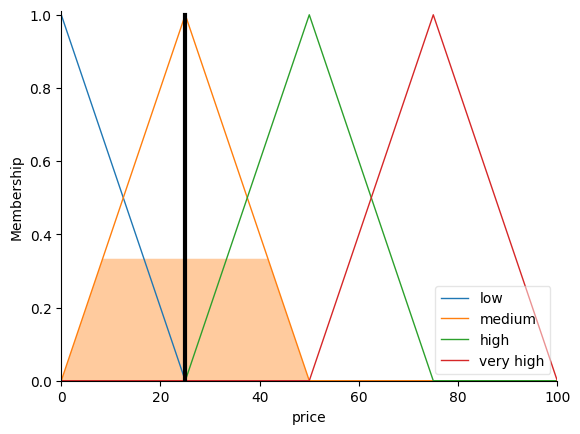

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

distance = ctrl.Antecedent(np.arange(0, 51, 0.1), 'distance')
traffic = ctrl.Antecedent(np.arange(0, 101, 0.1), 'traffic')
demand = ctrl.Antecedent(np.arange(0, 101, 0.1), 'demand')
weather = ctrl.Antecedent(np.arange(0, 4, 0.1), 'weather')
rating = ctrl.Antecedent(np.arange(1, 6, 0.5), 'rating')
punctuality = ctrl.Antecedent(np.arange(0, 101, 0.1), 'punctuality')

price = ctrl.Consequent(np.arange(0, 101, 1), 'price')
incentive = ctrl.Consequent(np.arange(0, 51, 0.1), 'incentive')

distance['short'] = fuzz.trimf(distance.universe, [0, 0, 3])
distance['medium'] = fuzz.trimf(distance.universe, [2, 5, 8])
distance['long'] = fuzz.trimf(distance.universe, [6, 13, 20])
distance['very long'] = fuzz.trimf(distance.universe, [15, 32.5, 50])

traffic['low'] = fuzz.trimf(traffic.universe, [0, 0, 30])
traffic['medium'] = fuzz.trimf(traffic.universe, [20, 45, 70])
traffic['high'] = fuzz.trimf(traffic.universe, [60, 85, 100])

demand['low'] = fuzz.trimf(demand.universe, [0, 0, 30])
demand['medium'] = fuzz.trimf(demand.universe, [20, 50, 70])
demand['high'] = fuzz.trimf(demand.universe, [60, 85, 100])

weather['good'] = fuzz.trimf(weather.universe, [0, 0, 1])
weather['moderate'] = fuzz.trimf(weather.universe, [0, 1, 2])
weather['bad'] = fuzz.trimf(weather.universe, [1, 2, 2])

rating['poor'] = fuzz.trimf(rating.universe, [1, 1, 2.5])
rating['average'] = fuzz.trimf(rating.universe, [2, 3, 4])
rating['good'] = fuzz.trimf(rating.universe, [3, 4, 5])

punctuality['late'] = fuzz.trimf(punctuality.universe, [0, 0, 50])
punctuality['on time'] = fuzz.trimf(punctuality.universe, [40, 60, 80])
punctuality['early'] = fuzz.trimf(punctuality.universe, [70, 100, 100])

price['low'] = fuzz.trimf(price.universe, [0, 0, 25])
price['medium'] = fuzz.trimf(price.universe, [0, 25, 50])
price['high'] = fuzz.trimf(price.universe, [25, 50, 75])
price['very high'] = fuzz.trimf(price.universe, [50, 75, 100])

incentive['none'] = fuzz.trimf(incentive.universe, [0, 0, 10])
incentive['few'] = fuzz.trimf(incentive.universe, [0, 10, 25])
incentive['moderate'] = fuzz.trimf(incentive.universe, [10, 25, 40])
incentive['high'] = fuzz.trimf(incentive.universe, [25, 40, 50])

rule1 = ctrl.Rule(distance['short'] & traffic['low'] & demand['low'], price['low'])
rule2 = ctrl.Rule(distance['short'] & traffic['medium'] & demand['high'], price['medium'])
rule3 = ctrl.Rule(distance['medium'] & traffic['high'] & demand['high'], price['high'])
rule4 = ctrl.Rule(distance['long'] & traffic['medium'] & weather['good'], price['medium'])
rule5 = ctrl.Rule(distance['long'] & traffic['high'] & weather['bad'], price['very high'])
rule6 = ctrl.Rule(distance['very long'] & traffic['high'] & demand['high'], price['very high'])
rule7 = ctrl.Rule(distance['medium'] & traffic['low'] & demand['low'], price['medium'])
rule8 = ctrl.Rule(distance['short'] & traffic['high'] & weather['bad'], price['high'])
rule9 = ctrl.Rule(distance['very long'] & weather['bad'], price['very high'])
rule10 = ctrl.Rule(distance['medium'] & traffic['medium'] & weather['moderate'], price['medium'])

rule11 = ctrl.Rule(rating['good'] & punctuality['early'], incentive['high'])
rule12 = ctrl.Rule(rating['average'] & punctuality['on time'], incentive['moderate'])
rule13 = ctrl.Rule(rating['poor'] & punctuality['late'], incentive['none'])
rule14 = ctrl.Rule(distance['long'] & traffic['high'] & punctuality['on time'], incentive['high'])
rule15 = ctrl.Rule(distance['medium'] & traffic['medium'] & rating['good'], incentive['moderate'])
rule16 = ctrl.Rule(rating['poor'] & punctuality['late'], incentive['none'])
rule17 = ctrl.Rule(distance['very long'] & weather['bad'] & rating['good'], incentive['high'])
rule18 = ctrl.Rule(distance['short'] & rating['average'] & punctuality['on time'], incentive['few'])
rule19 = ctrl.Rule(distance['long'] & traffic['high'] & punctuality['late'], incentive['none'])
rule20 = ctrl.Rule(distance['medium'] & weather['moderate'] & rating['good'], incentive['moderate'])

contrl_system = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20
])

fuzzy_system = ctrl.ControlSystemSimulation(contrl_system)

fuzzy_system.input['distance'] = 3
fuzzy_system.input['traffic'] = 2
fuzzy_system.input['demand'] = 1
fuzzy_system.input['weather'] = 0
fuzzy_system.input['rating'] = 5
fuzzy_system.input['punctuality'] = 90
fuzzy_system.compute()

print(f"Predicted Price: {fuzzy_system.output['price']}")

price.view(sim=fuzzy_system)

Recommended Discount: 55.00000000000002%


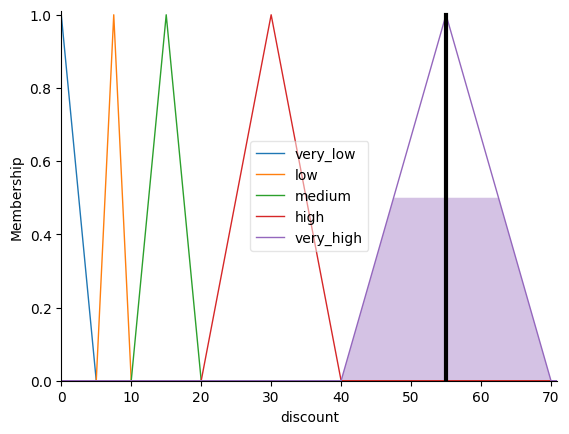

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# tạo hàm liên thuộc cho inputs
store_rating = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'store_rating')
sales_volume = ctrl.Antecedent(np.arange(0, 101, 1), 'sales_volume')
profit_margin = ctrl.Antecedent(np.arange(0, 101, 0.1), 'profit_margin')
seasonal_event = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonal_event')
competitor_discounts = ctrl.Antecedent(np.arange(0, 71, 1), 'competitor_discounts')

discount = ctrl.Consequent(np.arange(0, 71, 0.1), 'discount')

store_rating['low'] = fuzz.trimf(store_rating.universe, [0, 0,4.0])
store_rating['medium'] = fuzz.trimf(store_rating.universe, [4, 4.25, 4.5])
store_rating['high'] = fuzz.trimf(store_rating.universe, [4.5, 5, 5])

sales_volume['low'] = fuzz.trimf(sales_volume.universe, [0, 0, 50])
sales_volume['medium'] = fuzz.trimf(sales_volume.universe, [50, 65, 80])
sales_volume['high'] = fuzz.trimf(sales_volume.universe, [80, 100, 100])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 30])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [30,40,50])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [50, 75, 100])

seasonal_event['none'] = fuzz.trimf(seasonal_event.universe, [0, 0, 0])
seasonal_event['moderate'] = fuzz.trimf(seasonal_event.universe, [0, 2, 4])
seasonal_event['high'] = fuzz.trimf(seasonal_event.universe, [2, 6, 10])

competitor_discounts['low'] = fuzz.trimf(competitor_discounts.universe, [0, 0, 30])
competitor_discounts['medium'] = fuzz.trimf(competitor_discounts.universe, [20, 35, 50])
competitor_discounts['high'] = fuzz.trimf(competitor_discounts.universe, [50, 60, 70])

discount['very_low'] = fuzz.trimf(discount.universe, [0, 0, 5])
discount['low'] = fuzz.trimf(discount.universe, [5, 7.5, 10])
discount['medium'] = fuzz.trimf(discount.universe, [10, 15, 20])
discount['high'] = fuzz.trimf(discount.universe, [20, 30, 40])
discount['very_high'] = fuzz.trimf(discount.universe, [40, 55, 70])

rule1 = ctrl.Rule(store_rating['high'] & sales_volume['high'] & profit_margin['high'], discount['very_low'])
rule2 = ctrl.Rule(store_rating['low'] & sales_volume['low'] & profit_margin['high'], discount['high'])
rule3 = ctrl.Rule(seasonal_event['high'] & competitor_discounts['high'], discount['very_high'])
rule4 = ctrl.Rule(store_rating['medium'] & sales_volume['medium'] & profit_margin['medium'], discount['medium'])
rule5 = ctrl.Rule(competitor_discounts['low'] & profit_margin['low'] & sales_volume['high'], discount['very_low'])
rule6 = ctrl.Rule(store_rating['low'] & seasonal_event['none'], discount['medium'])
rule7 = ctrl.Rule(sales_volume['low'] & profit_margin['low'], discount['very_high'])

discount_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
discount_sim = ctrl.ControlSystemSimulation(discount_ctrl)

discount_sim.input['store_rating'] = 4.3  # Medium
discount_sim.input['sales_volume'] = 50  # Medium
discount_sim.input['profit_margin'] = 20  # Low
discount_sim.input['seasonal_event'] = 8  # High
discount_sim.input['competitor_discounts'] = 60  # High

discount_sim.compute()

# Output the result
print(f"Recommended Discount: {discount_sim.output['discount']}%")

# Visualize the results
discount.view(sim=discount_sim)

Predicted Price: 10.555555555555546


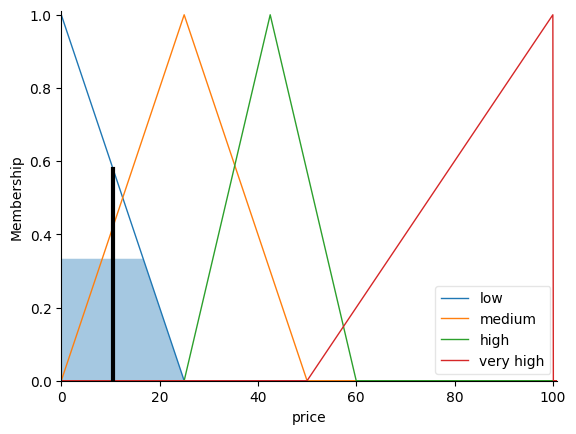

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

distance = ctrl.Antecedent(np.arange(0, 51, 1), 'distance')
traffic = ctrl.Antecedent(np.arange(0, 11, 0.1), 'traffic')
demand = ctrl.Antecedent(np.arange(0, 11, 0.1), 'demand')
weather = ctrl.Antecedent(np.arange(0, 3, 1), 'weather')
rating = ctrl.Antecedent(np.arange(0, 6, 0.5), 'rating')

price = ctrl.Consequent(np.arange(0, 101, 0.1), 'price')
incentive = ctrl.Consequent(np.arange(0, 51, 1), 'incentive')

distance['short'] = fuzz.trimf(distance.universe, [0, 0, 3])
distance['medium'] = fuzz.trimf(distance.universe, [2, 5, 8])
distance['long'] = fuzz.trimf(distance.universe, [6, 13, 20])
distance['very long'] = fuzz.trimf(distance.universe, [15, 32.5, 50])

traffic['low'] = fuzz.trimf(traffic.universe, [0, 0, 3])
traffic['medium'] = fuzz.trimf(traffic.universe, [2, 5, 8])
traffic['high'] = fuzz.trimf(traffic.universe, [5, 10, 10])

demand['low'] = fuzz.trimf(demand.universe, [0, 0, 3])
demand['medium'] = fuzz.trimf(demand.universe, [2, 4.5, 7])
demand['high'] = fuzz.trimf(demand.universe, [6, 10, 10])

weather['good'] = fuzz.trimf(weather.universe, [0, 0, 1])
weather['average'] = fuzz.trimf(weather.universe, [0, 1, 2])
weather['bad'] = fuzz.trimf(weather.universe, [1, 2, 2])

rating['poor'] = fuzz.trimf(rating.universe, [0, 0, 2.5])
rating['average'] = fuzz.trimf(rating.universe, [2, 3, 4])
rating['good'] = fuzz.trimf(rating.universe, [3, 4, 5])

price['low'] = fuzz.trimf(price.universe, [0, 0, 25])
price['medium'] = fuzz.trimf(price.universe, [0, 25, 50])
price['high'] = fuzz.trimf(price.universe, [25, 42.5, 60])
price['very high'] = fuzz.trimf(price.universe, [50, 100, 100])

incentive['low'] = fuzz.trimf(incentive.universe, [0, 0, 20])
incentive['medium'] = fuzz.trimf(incentive.universe, [0, 25, 50])
incentive['high'] = fuzz.trimf(incentive.universe, [30, 50, 50])

rule1 = ctrl.Rule(distance['short'] & traffic['low'] & demand['low'], price['low'])
rule2 = ctrl.Rule(distance['short'] & traffic['medium'] & demand['high'], price['medium'])
rule3 = ctrl.Rule(distance['medium'] & traffic['high'] & demand['high'], price['high'])
rule4 = ctrl.Rule(distance['long'] & traffic['medium'] & weather['good'], price['medium'])
rule5 = ctrl.Rule(distance['long'] & traffic['high'] & weather['bad'], price['very high'])
rule6 = ctrl.Rule(distance['very long'] & traffic['high'] & demand['high'], price['very high'])
rule7 = ctrl.Rule(distance['medium'] & traffic['low'] & demand['low'], price['medium'])
rule8 = ctrl.Rule(distance['short'] & traffic['high'] & weather['bad'], price['medium'])
rule9 = ctrl.Rule(distance['very long'] & weather['bad'], price['very high'])
rule10 = ctrl.Rule(distance['medium'] & traffic['medium'] & weather['average'], price['medium'])

rule11 = ctrl.Rule(distance['long'] & traffic['medium'] & demand['low'] & weather['good'] & rating['good'], incentive['low'])
rule12 = ctrl.Rule(distance['short'] & traffic['high'] & demand['medium'] & weather['good'] & rating['poor'], incentive['medium'])
rule13 = ctrl.Rule(distance['long'] & traffic['low'] & demand['low'] & weather['good'] & rating['good'], incentive['low'])
rule14 = ctrl.Rule(distance['medium'] & traffic['medium'] & demand['high'] & weather['good'] & rating['average'], incentive['high'])
rule15 = ctrl.Rule(distance['short'] & traffic['low'] & demand['high'] & weather['good'] & rating['good'], incentive['low'])
rule16 = ctrl.Rule(distance['long'] & traffic['medium'] & demand['low'] & weather['bad'] & rating['poor'], incentive['medium'])
rule17 = ctrl.Rule(distance['short'] & traffic['low'] & demand['medium'] & weather['good'] & rating['good'], incentive['low'])
rule18 = ctrl.Rule(distance['medium'] & traffic['high'] & demand['medium'] & weather['good'] & rating['average'], incentive['medium'])
rule19 = ctrl.Rule(distance['long'] & traffic['high'] & demand['low'] & weather['good'] & rating['poor'], incentive['medium'])
rule20 = ctrl.Rule(distance['short'] & traffic['low'] & demand['high'] & weather['good'] & rating['good'], incentive['low'])


contrl_system = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20
])

fuzzy_system = ctrl.ControlSystemSimulation(contrl_system)

fuzzy_system.input['distance'] = 1
fuzzy_system.input['traffic'] = 2
fuzzy_system.input['demand'] = 1
fuzzy_system.input['weather'] = 0
fuzzy_system.input['rating'] = 5

fuzzy_system.compute()

print(f"Predicted Price: {fuzzy_system.output['price']}")

price.view(sim=fuzzy_system)